In [46]:
import pandas as pd
import numpy as np
import requests
from pycaret.time_series import *
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt

In [11]:
def gerando_datas(ano_inicial, ano_final):
    datas = {}
    for ano in range(ano_inicial, ano_final+1):
        for mes in range(1, 13):
            data_inicial = f"01/{mes:02d}/{ano}"
            data_final = f"{date(ano, mes, 1) + relativedelta(months=1) - relativedelta(days=1):%d/%m/%Y}"
            mes_ano = f"{mes:02d}/{ano}"
            datas[mes_ano] = data_inicial, data_final
            #datas.append(f"{mes_ano}:{data_inicial, data_final}")
    return datas

In [12]:
def imposto_mes(data_inicio, data_fim):
    url = f"https://impostometro.com.br/Contador/Brasil?dataInicial={data_inicio}&dataFinal={data_fim}&_=1722216591445"
    #url = "https://impostometro.com.br/Contador/Brasil?dataInicial=01/01/2024&dataFinal=31/07/2024&_=1722216591445"
    headers = {
    "accept": "application/json, text/javascript, */*; q=0.01",
    "accept-encoding": "gzip, deflate, br, zstd",
    "accept-language": "pt-BR,pt;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6",
    "cookie": "_gid=GA1.3.390972816.1722216592; AdoptVisitorId=BwiGAYFMBYFYFpIGMnHtUBOS9sDNx5YAmJaYAEwGZZMA2GIA; AdoptConsent=N4Ig7gpgRgzglgFwgSQCIgFwgOwDMAMALACYAcAhgMwC0AnAEwBsu1hj+x15t+j1x9fESjZGxAIzFCIADQgAbnHgIA9gCdkxTCFK7y+CIQCs1CAGMzpVtwh0IBakfpnCpYpSO1Gh2SARncAGUENTgAOwBzbV8VAAcEZDCAFXIImEwAbRBGNQAlYgBZagB1AEFCAC9fADUAMXIALQA5ACt+AoAJGoK4AFE1FABNWoBHX2QARQAPABkAfQANZFLAqF8YIwBpCE3eswApABsjEABdOTiEAHkAVwQUtMyQCaheqDnD2uoAYVJfIQaxUGc0I5Bg1F8lEIAE8AAqwhD4ABCtHQchGSQA1lMILE4PhqCpfNwFiNYtRMb0jGpfC0jDN8KVUEiKt5fAUIDcAOKUSiwmYzE5yOZJIxmMLkXCDXDFXy0UgzZBzfC5NQwBC+EjyDrYBrfUr4Q6+CIFVSBQ5XAAWpTMvi5tCuUwAqldYZaFvhfBB5PRiLRMQBbBDQo1yOBmWIzJ2DQbVfC2uTycSMMAVYpXWILIUgQYzKCMKZcwioWr0XzYIy5cjUMwqWiHLRyIwwQL1WgwQjfK5ywhqLmWgoNNRO2iQ8gtejkCq1eQFGlyYojTGMPUwKUB3xI4rYbVQQKxS3dsOxb5qBAwGa0CZdOT1TG0Wq9AOYpHIXxQMCwqDQ1wwNQTXwmiuMBxGhJpNldbMriMUQKm+J0GlQSgzjkWswhgCAwgQaoIDVOAVDCTB8DkG5YmIcgkGIUoNSwQR6EIah8Gwah6FoJJ8HEDBKHwDBCFoAA6Iw+IaEAAF8gA==; _ga_4Q3C1RENSE=GS1.1.1722216592.1.1.1722217067.0.0.0; _ga=GA1.3.1391487878.1722216592; _gat_gtag_UA_5220667_2=1",
    "priority": "u=1, i",
    "referer": "https://impostometro.com.br/",
    "sec-ch-ua": "\"Not)A;Brand\";v=\"99\", \"Microsoft Edge\";v=\"127\", \"Chromium\";v=\"127\"",
    "sec-ch-ua-mobile": "?1",
    "sec-ch-ua-platform": "\"Android\"",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Mobile Safari/537.36 Edg/127.0.0.0",
    "x-requested-with": "XMLHttpRequest"
}
    response = requests.get(url, headers=headers)
    
    return response.json()

In [13]:
ano_inicial = 2010
ano_final = 2024
gerando_datas(ano_inicial, ano_final)

{'01/2010': ('01/01/2010', '31/01/2010'),
 '02/2010': ('01/02/2010', '28/02/2010'),
 '03/2010': ('01/03/2010', '31/03/2010'),
 '04/2010': ('01/04/2010', '30/04/2010'),
 '05/2010': ('01/05/2010', '31/05/2010'),
 '06/2010': ('01/06/2010', '30/06/2010'),
 '07/2010': ('01/07/2010', '31/07/2010'),
 '08/2010': ('01/08/2010', '31/08/2010'),
 '09/2010': ('01/09/2010', '30/09/2010'),
 '10/2010': ('01/10/2010', '31/10/2010'),
 '11/2010': ('01/11/2010', '30/11/2010'),
 '12/2010': ('01/12/2010', '31/12/2010'),
 '01/2011': ('01/01/2011', '31/01/2011'),
 '02/2011': ('01/02/2011', '28/02/2011'),
 '03/2011': ('01/03/2011', '31/03/2011'),
 '04/2011': ('01/04/2011', '30/04/2011'),
 '05/2011': ('01/05/2011', '31/05/2011'),
 '06/2011': ('01/06/2011', '30/06/2011'),
 '07/2011': ('01/07/2011', '31/07/2011'),
 '08/2011': ('01/08/2011', '31/08/2011'),
 '09/2011': ('01/09/2011', '30/09/2011'),
 '10/2011': ('01/10/2011', '31/10/2011'),
 '11/2011': ('01/11/2011', '30/11/2011'),
 '12/2011': ('01/12/2011', '31/12/

In [14]:
def dados_imposto(datas):
    resultados = []
    for mes_ano, datas in datas.items():
        data_inicio, data_fim = datas
        imposto = imposto_mes(data_inicio, data_fim)
        imposto = imposto['Valor']
        resultados.append({"dt_periodo": mes_ano, "vl_imposto": imposto})
    
    df = pd.DataFrame(resultados)
    
    return df

In [15]:
datas = gerando_datas(ano_inicial, ano_final)

In [16]:
df = dados_imposto(datas)
df['dt_periodo'] = pd.to_datetime(df['dt_periodo'], format='%m/%Y')

In [18]:
def monta_df_prev(df, m):
    data_atual = max(df['dt_periodo'])
    data_inicial = data_atual + relativedelta(months=1)
    data_final = data_inicial + relativedelta(months=m)
    data_validacao = data_atual - relativedelta(months=5)
    
    df_datas = pd.DataFrame({'dt_periodo': pd.date_range(data_inicial, data_final, freq='D')})
    df_prev = df_datas[df_datas['dt_periodo'].dt.day == 1]
    
    df_datas_validacao = pd.DataFrame({'dt_periodo': pd.date_range(data_validacao, data_atual, freq='D')})
    
    df_validacao = df_datas_validacao[df_datas_validacao['dt_periodo'].dt.day == 1]
    
    return df_prev, df_validacao

In [36]:
def prev_imposto(df):
    m = 24
    df_prev, df_validacao = monta_df_prev(df, m)
    lista_col = df.columns.tolist()
    del lista_col[0]
    
    df = df.sort_values('dt_periodo')
    df['dt_periodo'] = pd.to_datetime(df['dt_periodo'], format='%m/%Y', dayfirst=True)
    df.set_index('dt_periodo', inplace=True, drop=True)
    
    for i in lista_col:
        df = df[[i]]
        
        exp = TSForecastingExperiment()
        exp.setup(df, fh = m, session_id = 42, verbose = False)
        
        melhor_modelo = exp.compare_models(sort='MAPE', turbo=False)
        modelo = exp.create_model(melhor_modelo)
        
        y_treino = exp.get_config('y_train')
        y_teste = exp.get_config('y_test')
        y_predicao = exp.predict_model(modelo)
        
        y_predicao.index.to_timestamp()
        y_predicao.reset_index(inplace=True)
        y_predicao.rename(columns={'index': 'dt_periodo', 'y_pred': 'vl_imposto'}, inplace=True)
        
        df_prev = pd.merge(df_prev, y_predicao, on='dt_periodo', how='left')
        df_validacao = pd.merge(df_validacao, y_predicao, on='dt_periodo', how='left')
    
    return y_predicao

In [37]:
y_predicao = prev_imposto(df)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259,0.7067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259,0.7900
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259,1.1067
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259,0.4533
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259,0.5200
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.2441,1.3514,16355003599.0547,21118180025.6024,0.0847,0.0803,0.2101,0.9233
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3025,1.3771,17169906156.0669,21607895893.4619,0.0882,0.0841,0.1884,0.8100
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.4064,1.4593,18416475835.5750,22738762217.9175,0.0958,0.0902,0.0851,0.7600
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.5168,1.5603,20393111513.4941,24798931186.3469,0.1021,0.0996,-0.0450,1.2333
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.5737,1.6005,21058196671.4628,25388101693.4551,0.1058,0.1020,-0.1127,2.6000


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2016-12,0.5759,0.7097,6675477026.9755,9779523765.7278,0.0334,0.0340,0.7985
1,2018-12,2.0514,2.2604,26038657259.5153,33787058799.1215,0.1508,0.1334,-0.6104
2,2020-12,0.9576,1.0364,14220407163.9642,18843528260.9511,0.0605,0.0636,0.4896
Mean,NaT,1.1950,1.3355,15644847150.1517,20803370275.2668,0.0815,0.0770,0.2259
SD,NaT,0.6253,0.6674,7968896165.0968,9898524136.9850,0.0502,0.0417,0.6046


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LinearRegression,1.9322,1.9491,35084764655.2808,43375479662.9533,0.1175,0.1284,-0.4081


In [43]:
y_predicao['dt_periodo'] = y_predicao['dt_periodo'].dt.strftime('%m/%Y')

In [48]:
y_predicao.to_excel('imposto.xlsx', index=False)

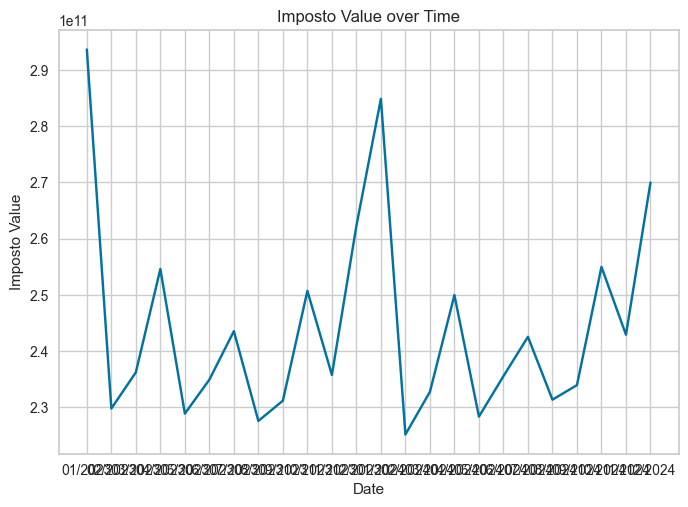

In [45]:
plt.plot(y_predicao['dt_periodo'], y_predicao['vl_imposto'])
plt.xlabel('Date')
plt.ylabel('Imposto Value')
plt.title('Imposto Value over Time')
plt.show()